In [1]:
import os

In [9]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\Kartik Mathur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 7.2/7.2 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB 1.5 MB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 KB 6.0 MB/s eta 0:00:00


In [2]:
len(os.listdir('dataset/tobeaugmented/defected'))

101

In [3]:
import cv2

In [4]:
img = cv2.imread('dataset/tobeaugmented/non-defect/20200630_114408.jpg')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

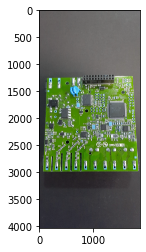

In [6]:
plt.imshow(img)

In [7]:
img.shape

(4032, 1860, 3)

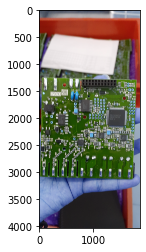

In [8]:
img1 = cv2.imread('dataset/tobeaugmented/non-defect/20200630_121030.jpg')
plt.imshow(img1)

In [9]:
img1.shape

(4032, 1860, 3)

In [10]:
urls = os.listdir('dataset/tobeaugmented/defected')

In [11]:
path = "dataset/tobeaugmented/defected/" + urls[0]

In [12]:
path

'dataset/tobeaugmented/defected/20200707_085703.jpg'

In [13]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path+'/'+urls[i]
    img = cv2.imread(img_path)
    #data = data/255.0 :Normalising
    img = cv2.resize(img,(299,299))
    images.append(img)
    labels.append(target)
  #images - np.asarray(images) : converting list to array
  return images,labels

In [14]:
defected_path = "dataset/tobeaugmented/defected"
defected_url = os.listdir('dataset/tobeaugmented/defected')
defect_images, defect_targets = loadImages(defected_path, defected_url, 1)

In [15]:
non_defected_path = "dataset/tobeaugmented/non-defect"
non_defected_url = os.listdir('dataset/tobeaugmented/non-defect')
non_defect_images, non_defect_targets = loadImages(non_defected_path, non_defected_url, 0)

In [16]:
defect_images = np.asarray(defect_images)
non_defect_images = np.asarray(non_defect_images)

In [17]:
defect_images.shape

(101, 299, 299, 3)

In [18]:
non_defect_images.shape

(285, 299, 299, 3)

In [19]:
#r_ :  for stacking data rowwise
data = np.r_[defect_images, non_defect_images] 

In [20]:
data.shape

(386, 299, 299, 3)

In [21]:
defect_targets = np.asarray(defect_targets)
non_defect_targets = np.asarray(non_defect_targets)

In [22]:
Targets = np.r_[defect_targets, non_defect_targets]

In [23]:
Targets.shape

(386,)

In [24]:
data = data/255.0

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data, Targets, test_size=0.25)

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [29]:
model = Sequential([
    Conv2D(32,3, input_shape=(299,299,3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3,  activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3,  activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation= 'relu'),
    #Dense(512, activation= 'relu'),
    Dense(256, activation= 'relu'),
    Dense(1, activation='sigmoid')

])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

In [35]:
model.compile(optimizer='Nadam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [36]:
model.fit(x_train, y_train, batch_size=32, epochs =3, validation_data = (x_test, y_test))

Epoch 1/3
10/10 [==============================] - 27s 3s/step - loss: 0.2091 - accuracy: 0.9412 - val_loss: 0.2537 - val_accuracy: 0.8763
Epoch 2/3
10/10 [==============================] - 24s 2s/step - loss: 0.0362 - accuracy: 0.9896 - val_loss: 0.0667 - val_accuracy: 0.9794
Epoch 3/3
10/10 [==============================] - 25s 2s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9897


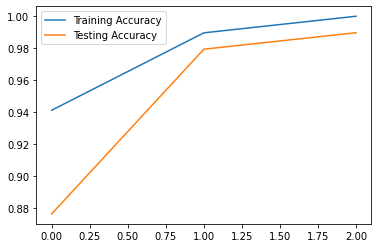

In [37]:
plt.plot(model.history.history['accuracy'], label = 'Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'Testing Accuracy')
plt.legend()
plt.show()

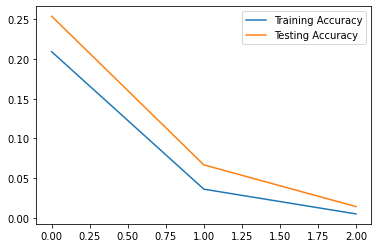

In [38]:
plt.plot(model.history.history['loss'], label = 'Training Accuracy')
plt.plot(model.history.history['val_loss'], label = 'Testing Accuracy')
plt.legend()
plt.show()